## Posture Detection Code

In [ ]:
!pip install mediapipe opencv-python
!pip install pandas

In [1]:
import mediapipe as mp
import cv2
import numpy as np
import time

In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

In [3]:
def calculate_angle(a, b, c):
    shoulder_elbow = np.array([a.x - b.x, b.y - a.y])
    elbow_wrist = np.array([b.x - c.x, c.y - b.y])
    theta_rad = np.arccos(shoulder_elbow.dot(elbow_wrist)/(np.linalg.norm(shoulder_elbow)*np.linalg.norm(elbow_wrist)))
    theta_degrees = 180 - np.rad2deg(theta_rad)
    return theta_degrees

In [ ]:
actual_data = [[]]
counter = -1

In [28]:
data = np.array([])
time_data = np.array([])
recording = False
cap = cv2.VideoCapture(0)
beginning_time = time.time()
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = holistic.process(image)
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        if recording:
            data = np.append(data, [calculate_angle(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_SHOULDER],
                              results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_ELBOW],
                              results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_WRIST])], axis = 0)
            time_data = np.append(time_data, [time.time() - beginning_time], axis = 0) 
        
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, mp_drawing.DrawingSpec(color = (255, 0, 0),
                                                                                                                      thickness = 2,
                                                                                                                      circle_radius = 1))
        cv2.imshow("Pose Detector", image)
        if cv2.waitKey(10) & 0xFF == ord(" "):
            if not recording:
                recording = True
                beginning_time = time.time()
            else:
                counter += 1
                break
actual_data[counter].append(data)
actual_data[counter].append(time_data)
actual_data.append([])
cap.release()
cv2.destroyAllWindows()

In [30]:
import pandas as pd
df = pd.DataFrame(actual_data)
df.to_csv("results.csv")

## Data Analysis Code

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

(This was a cell in which I did some data formatting; it was very messy).

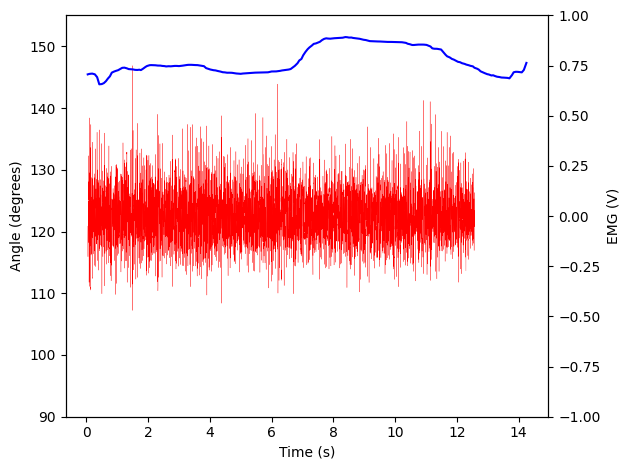

In [93]:
df = pd.read_csv("processed/extend.csv")
extend_data = pd.DataFrame.to_numpy(df)
extend_data = np.delete(extend_data, 0, 1)
fig, ax1 = plt.subplots()
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Angle (degrees)")
ax1.set_ylim(bottom = 90, top = 155)
ax1.plot(extend_time, extend_angle, color="b")
ax2 = ax1.twinx()
ax2.set_ylabel("EMG (V)")
ax2.set_ylim(bottom = -1, top = 1)
ax2.plot(extend_data[:,0][100:], extend_data[:,1][100:], color="r", linewidth=0.2)
ax1.set_zorder(ax2.get_zorder()+1)
ax1.patch.set_visible(False)
fig.tight_layout()
plt.show()

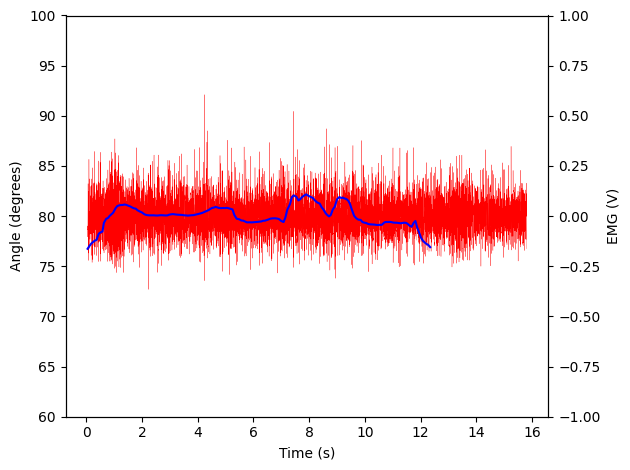

In [95]:
df = pd.read_csv("processed/right.csv")
right_data = pd.DataFrame.to_numpy(df)
right_data = np.delete(right_data, 0, 1)
fig, ax1 = plt.subplots()
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Angle (degrees)")
ax1.set_ylim(bottom = 60, top = 100)
ax1.plot(right_time, right_angle, color="b")
ax2 = ax1.twinx()
ax2.set_ylabel("EMG (V)")
ax2.set_ylim(bottom = -1, top = 1)
ax2.plot(right_data[:,0][100:], right_data[:,1][100:], color="r", linewidth=0.2)
ax1.set_zorder(ax2.get_zorder()+1)
ax1.patch.set_visible(False)
fig.tight_layout()
plt.show()

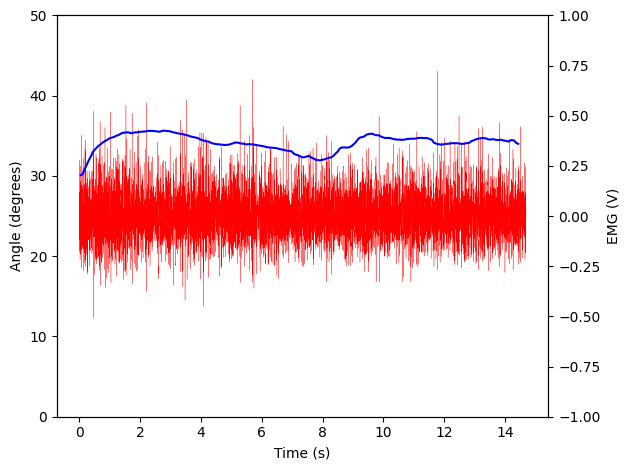

In [98]:
df = pd.read_csv("processed/acute.csv")
acute_data = pd.DataFrame.to_numpy(df)
acute_data = np.delete(acute_data, 0, 1)
fig, ax1 = plt.subplots()
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Angle (degrees)")
ax1.set_ylim(bottom = 0, top = 50)
ax1.plot(acute_time, acute_angle, color="b")
ax2 = ax1.twinx()
ax2.set_ylabel("EMG (V)")
ax2.set_ylim(bottom = -1, top = 1)
ax2.plot(acute_data[:,0], acute_data[:,1], color="r", linewidth=0.2)
ax1.set_zorder(ax2.get_zorder()+1)
ax1.patch.set_visible(False)
fig.tight_layout()
plt.show()

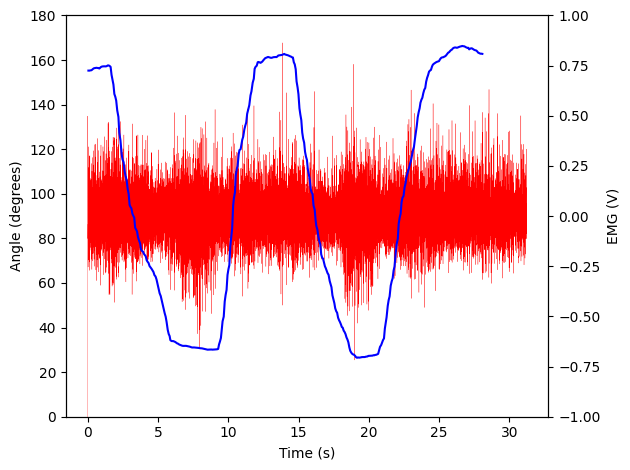

In [103]:
df = pd.read_csv("processed/extend_to_acute.csv")
extend_to_acute_data = pd.DataFrame.to_numpy(df)
extend_to_acute_data = np.delete(extend_to_acute_data, 0, 1)
fig, ax1 = plt.subplots()
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Angle (degrees)")
ax1.set_ylim(bottom = 0, top = 180)
ax1.plot(extend_acute_time, extend_acute_angle, color="b")
ax2 = ax1.twinx()
ax2.set_ylabel("EMG (V)")
ax2.set_ylim(bottom = -1, top = 1)
ax2.plot(extend_to_acute_data[:,0], extend_to_acute_data[:,1], color="r", linewidth=0.2)
ax1.set_zorder(ax2.get_zorder()+1)
ax1.patch.set_visible(False)
fig.tight_layout()
plt.show()

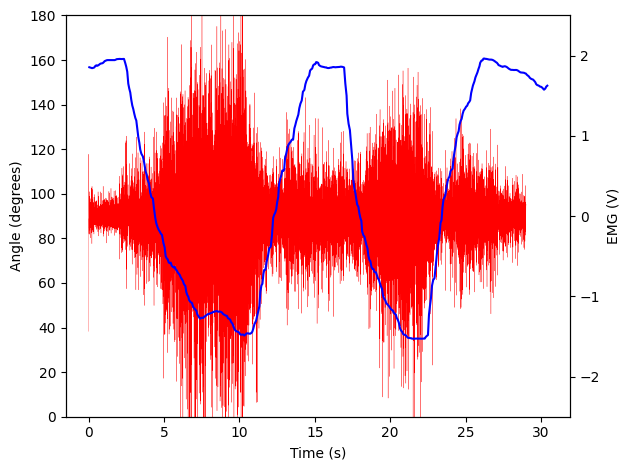

In [106]:
df = pd.read_csv("processed/extend_to_acute_flex.csv")
extend_to_acute_flex_data = pd.DataFrame.to_numpy(df)
extend_to_acute_flex_data = np.delete(extend_to_acute_flex_data, 0, 1)
fig, ax1 = plt.subplots()
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Angle (degrees)")
ax1.set_ylim(bottom = 0, top = 180)
ax1.plot(extend_acute_flex_time, extend_acute_flex_angle, color="b")
ax2 = ax1.twinx()
ax2.set_ylabel("EMG (V)")
ax2.set_ylim(bottom = -2.5, top = 2.5)
ax2.plot(extend_to_acute_flex_data[:,0], extend_to_acute_flex_data[:,1], color="r", linewidth=0.2)
ax1.set_zorder(ax2.get_zorder()+1)
ax1.patch.set_visible(False)
fig.tight_layout()
plt.show()

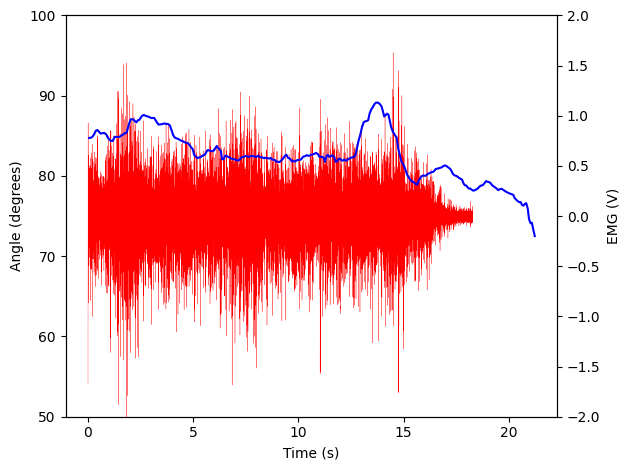

In [108]:
df = pd.read_csv("processed/right_flex.csv")
right_flex_data = pd.DataFrame.to_numpy(df)
right_flex_data = np.delete(right_flex_data, 0, 1)
fig, ax1 = plt.subplots()
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Angle (degrees)")
ax1.set_ylim(bottom = 50, top = 100)
ax1.plot(right_flex_time, right_flex_angle, color="b")
ax2 = ax1.twinx()
ax2.set_ylabel("EMG (V)")
ax2.set_ylim(bottom = -2, top = 2)
ax2.plot(right_flex_data[:,0], right_flex_data[:,1], color="r", linewidth=0.2)
ax1.set_zorder(ax2.get_zorder()+1)
ax1.patch.set_visible(False)
fig.tight_layout()
plt.show()

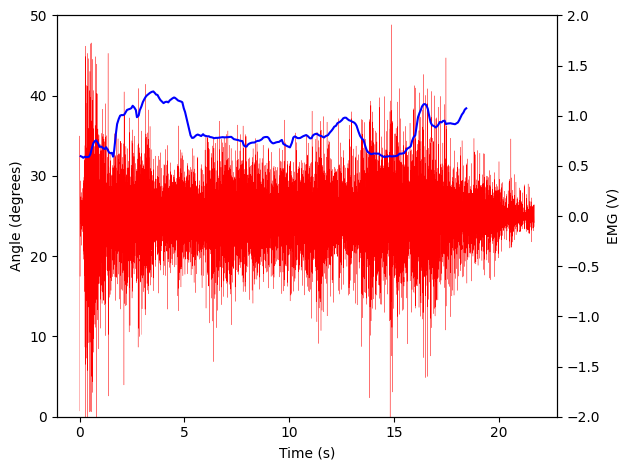

In [ ]:
df = pd.read_csv("processed/acute_flex.csv")
acute_flex_data = pd.DataFrame.to_numpy(df)
acute_flex_data = np.delete(acute_flex_data, 0, 1)
fig, ax1 = plt.subplots()
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Angle (degrees)")
ax1.set_ylim(bottom = 0, top = 100)
ax1.plot(acute_flex_time, acute_flex_angle, color="b")
ax2 = ax1.twinx()
ax2.set_ylabel("EMG (V)")
ax2.set_ylim(bottom = -2, top = 2)
ax2.plot(acute_flex_data[:,0], acute_flex_data[:,1], color="r", linewidth=0.2)
ax1.set_zorder(ax2.get_zorder()+1)
ax1.patch.set_visible(False)
fig.tight_layout()
plt.show()

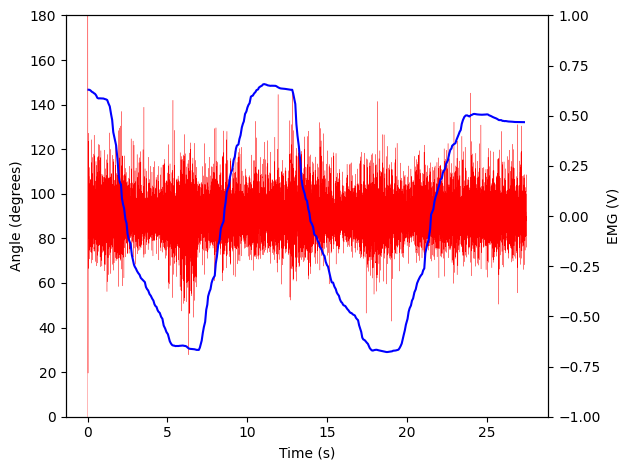

In [ ]:
df = pd.read_csv("processed/extend_to_acute_exercise.csv")
extend_to_acute_exercise_data = pd.DataFrame.to_numpy(df)
extend_to_acute_exercise_data = np.delete(extend_to_acute_exercise_data, 0, 1)
fig, ax1 = plt.subplots()
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Angle (degrees)")
ax1.set_ylim(bottom = 0, top = 180)
ax1.plot(extend_acute_exercise_time, extend_acute_exercise_angle, color="b")
ax2 = ax1.twinx()
ax2.set_ylabel("EMG (V)")
ax2.set_ylim(bottom = -1, top = 1)
ax2.plot(extend_to_acute_exercise_data[:,0], extend_to_acute_exercise_data[:,1], color="r", linewidth=0.2)
ax1.set_zorder(ax2.get_zorder()+1)
ax1.patch.set_visible(False)
fig.tight_layout()
plt.show()